<a href="https://colab.research.google.com/github/MohammedNayaz/Fashion-MNIST-Data-Classification-Project/blob/main/Fashion_MNIST_Data_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Data Classification Project



##1Import Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import keras

##2Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#print the dhape of the data
x_train.shape, y_train.shape, "***************", x_test.shape, y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [9]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Ankle", "Boots"]

In [10]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Ankle',
 'Boots']

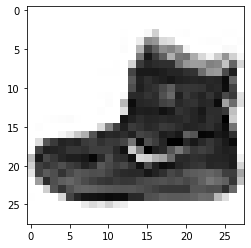

In [11]:
#show image
plt.imshow(x_train[0], cmap='Greys')

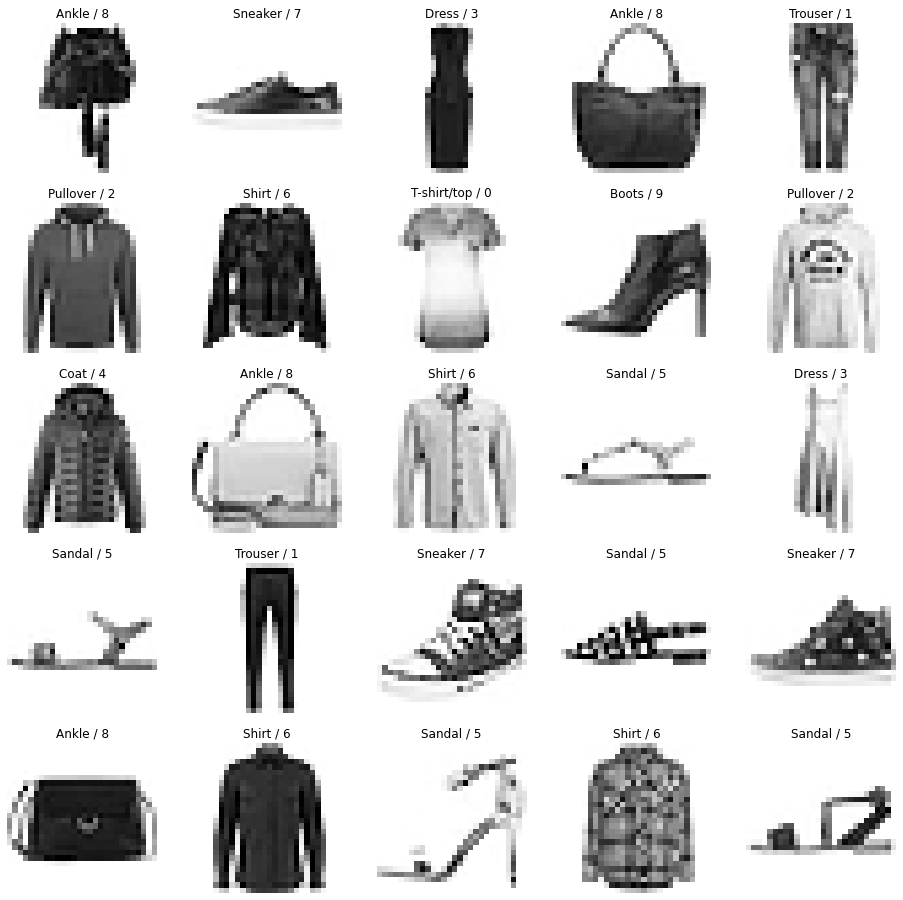

In [12]:
plt.figure(figsize = (16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [13]:
x_train.ndim

3

In [14]:
x_train = np.expand_dims(x_train, -1)

In [15]:
x_train.ndim

4

In [17]:
x_test = np.expand_dims(x_test,-1)

In [18]:
#Feature Saling
x_train = x_train/255
x_test = x_test/255

In [19]:
#Split Dataset
from sklearn.model_selection import train_test_split
x_train,x_Validation,y_train,y_Validation = train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

In [20]:
x_train.shape,x_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

##3 Build the CNN Model


###Model 1

In [28]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=10,batch_size=512, verbose=1,validation_data=(x_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 19s 190ms/step - loss: 0.6338 - accuracy: 0.7850 - val_loss: 0.4382 - val_accuracy: 0.8453
Epoch 2/10
94/94 [==============================] - 18s 190ms/step - loss: 0.3788 - accuracy: 0.8682 - val_loss: 0.3605 - val_accuracy: 0.8748
Epoch 3/10
94/94 [==============================] - 18s 190ms/step - loss: 0.3292 - accuracy: 0.8844 - val_loss: 0.3279 - val_accuracy: 0.8855
Epoch 4/10
94/94 [==============================] - 18s 189ms/step - loss: 0.2999 - accuracy: 0.8956 - val_loss: 0.3044 - val_accuracy: 0.8944
Epoch 5/10
94/94 [==============================] - 18s 190ms/step - loss: 0.2802 - accuracy: 0.8998 - val_loss: 0.2983 - val_accuracy: 0.8959
Epoch 6/10
94/94 [==============================] - 18s 190ms/step - loss: 0.2669 - accuracy: 0.9048 - val_loss: 0.2894 - val_accuracy: 0.9007
Epoch 7/10
94/94 [==============================] - 18s 190ms/step - loss: 0.2528 - accuracy: 0.9091 - val_loss: 0.2873 - val_accuracy: 0.8978

In [33]:
y_pred = model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.28, 0.05, 0.01]], dtype=float32)

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2767 - accuracy: 0.8991


[0.2767450213432312, 0.8991000056266785]

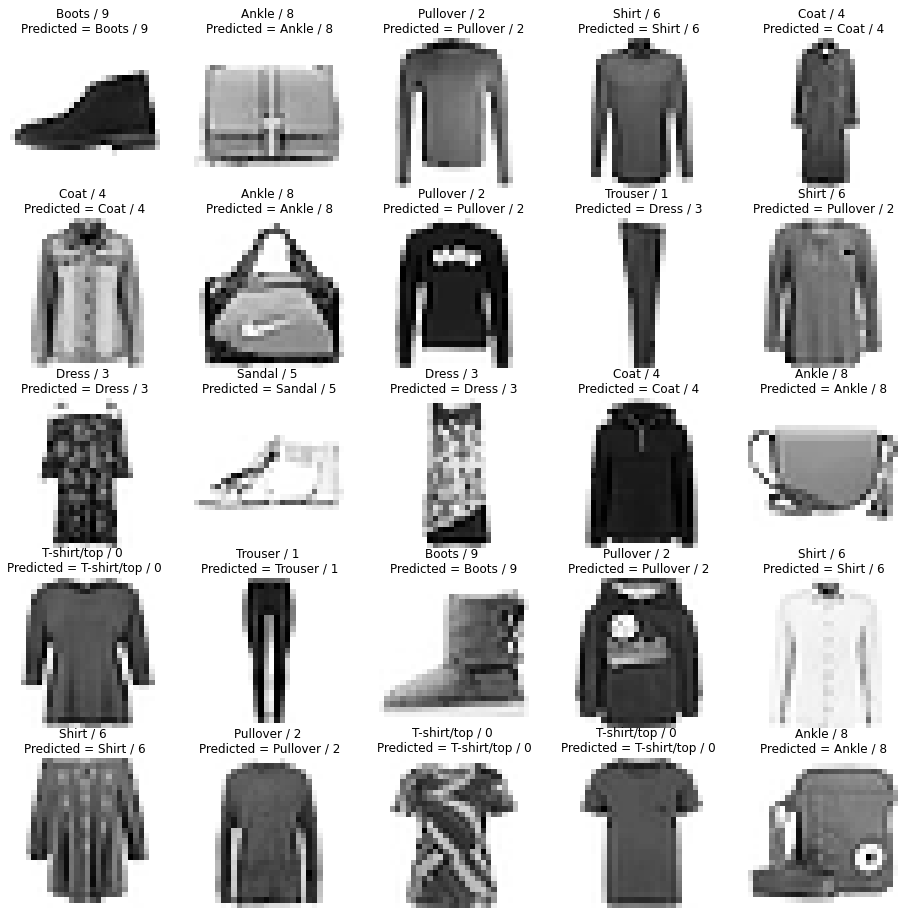

In [39]:
plt.figure(figsize = (16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('{} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

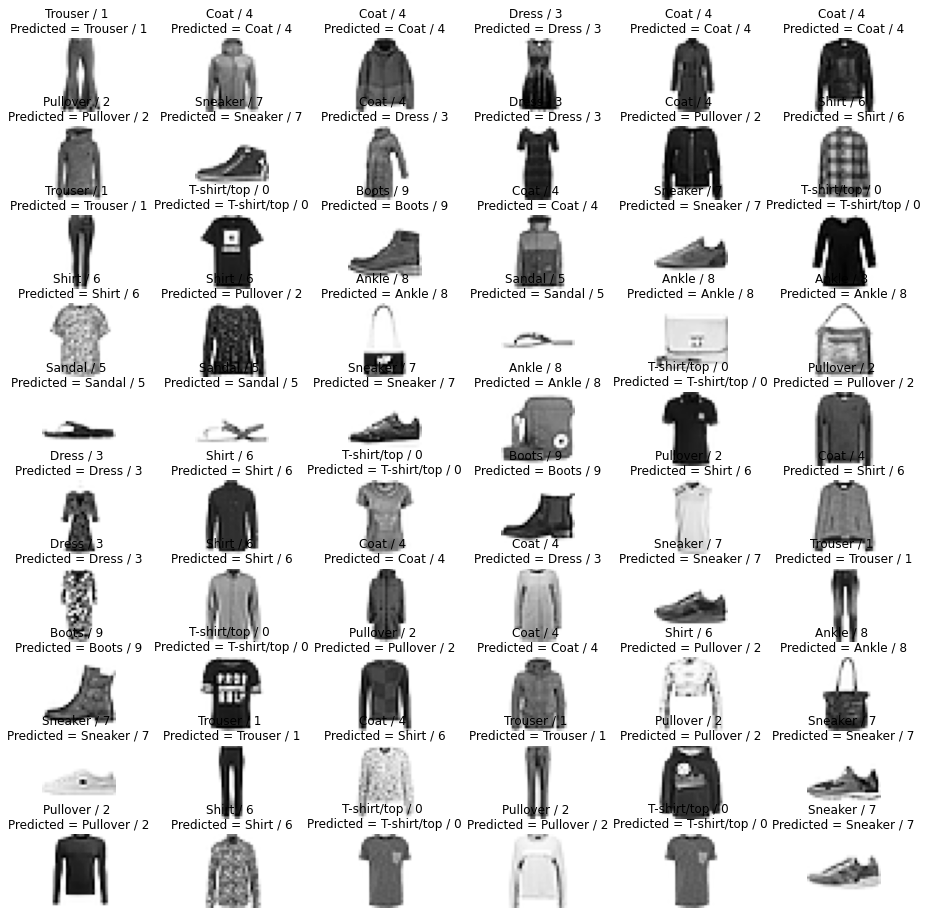

In [41]:
plt.figure(figsize = (16,16))

j=1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('{} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

In [42]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.82      0.84      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.85      0.84      0.85      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.72      0.71      1000
     Sneaker       0.95      0.94      0.95      1000
       Ankle       0.98      0.98      0.98      1000
       Boots       0.94      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



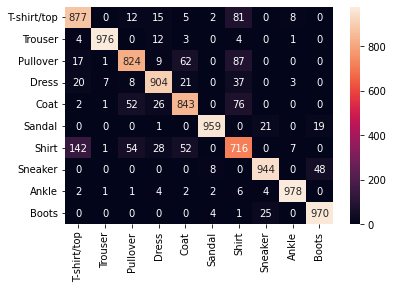

In [43]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

In [44]:
#Save Model
model.save('fashion_mnist_cnn_model.h5')

## 4 Build 2 Complex CNN

###Model 2

In [46]:
#Building CNN Model

cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])



In [48]:
#Compile the model
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
#Train the Model
cnn_model2.fit(x_train,y_train,epochs=20,batch_size=512, verbose=1,validation_data=(x_Validation,y_Validation))

Epoch 1/20
94/94 [==============================] - 23s 238ms/step - loss: 1.0225 - accuracy: 0.6268 - val_loss: 0.5833 - val_accuracy: 0.7755
Epoch 2/20
94/94 [==============================] - 22s 239ms/step - loss: 0.5532 - accuracy: 0.7927 - val_loss: 0.4645 - val_accuracy: 0.8291
Epoch 3/20
94/94 [==============================] - 23s 242ms/step - loss: 0.4700 - accuracy: 0.8281 - val_loss: 0.4092 - val_accuracy: 0.8510
Epoch 4/20
94/94 [==============================] - 23s 242ms/step - loss: 0.4154 - accuracy: 0.8480 - val_loss: 0.3759 - val_accuracy: 0.8599
Epoch 5/20
94/94 [==============================] - 23s 241ms/step - loss: 0.3772 - accuracy: 0.8620 - val_loss: 0.3532 - val_accuracy: 0.8692
Epoch 6/20
94/94 [==============================] - 23s 241ms/step - loss: 0.3533 - accuracy: 0.8699 - val_loss: 0.3359 - val_accuracy: 0.8737
Epoch 7/20
94/94 [==============================] - 23s 241ms/step - loss: 0.3274 - accuracy: 0.8794 - val_loss: 0.3252 - val_accuracy: 0.8791

In [50]:
#Save Model
cnn_model2.save('fashion_mnist_cnn_model2.h5')

###Model 3

In [51]:
#Building CNN Model

cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=256,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.50),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.50),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10,activation='softmax')
])



In [52]:
#Compile the model
cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
#Train the Model
cnn_model3.fit(x_train,y_train,epochs=50,batch_size=512, verbose=1,validation_data=(x_Validation,y_Validation))

Epoch 1/50
94/94 [==============================] - 80s 846ms/step - loss: 1.2168 - accuracy: 0.5277 - val_loss: 0.6172 - val_accuracy: 0.7658
Epoch 2/50
94/94 [==============================] - 79s 838ms/step - loss: 0.5921 - accuracy: 0.7811 - val_loss: 0.4854 - val_accuracy: 0.8141
Epoch 3/50
94/94 [==============================] - 85s 901ms/step - loss: 0.4797 - accuracy: 0.8265 - val_loss: 0.4006 - val_accuracy: 0.8547
Epoch 4/50
94/94 [==============================] - 83s 884ms/step - loss: 0.4123 - accuracy: 0.8543 - val_loss: 0.3721 - val_accuracy: 0.8674
Epoch 5/50
94/94 [==============================] - 85s 905ms/step - loss: 0.3587 - accuracy: 0.8755 - val_loss: 0.3207 - val_accuracy: 0.8850
Epoch 6/50
94/94 [==============================] - 82s 869ms/step - loss: 0.3313 - accuracy: 0.8846 - val_loss: 0.3263 - val_accuracy: 0.8845
Epoch 7/50
94/94 [==============================] - 78s 835ms/step - loss: 0.3029 - accuracy: 0.8938 - val_loss: 0.3015 - val_accuracy: 0.8923

In [54]:
#Save Model
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [56]:
cnn_model3.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.5308 - accuracy: 0.9047


[0.5308080315589905, 0.904699981212616]